## Exploratory Data Analysis

Objectives:

+ Importing Data
+ Analysing Individual Feature Patterns using Visualization
+ Descriptive Statistical Analysis
+ Basics of Grouping
+ Analysis of Variance (ANOVA)

#### 1.IMPORT DATA 

Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
path = "H:\Data Analysis with Python\wrangled.csv"
dataframe = pd.read_csv(path)
dataframe.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


The first column "Unnamed:0" is not needed. So drop the whole Column

In [3]:
dataframe = dataframe.drop(["Unnamed: 0"], axis = 1)
dataframe.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


#### 2.ANALYSING INDIVIDUAL FEATURE PATTERNS USING VISUALIZATION

Import Libraries for Visualization tasks

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

When visualizing individual variables, it is important to first understand what type of variable you are dealing with.

In [5]:
dataframe.dtypes

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
diesel                 int64
gas                    int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object

we can calculate the correlation between variables of type "int64" or "float64" using the method "corr"

In [6]:
dataframe.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


The diagonal elements are always one

To find the correlation between the following columns. "bore","stroke","compression-ratio" and "horsepower".

In [7]:
dataframe[["bore","stroke","compression-ratio","horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


**Continuous Numerical Variables**

+ Continuous numerical variables are variables that may contain any value within some range.

+ Continuous numerical variables can have the type "int64" or "float64"

+ A method to visualize these variables is using scatterplots with fitted lines.

+ And it will give a Linear Relationship between variables

***Positive and Negative Linear Relationships***

Relationship between "engine-size" and "price"

(0.0, 53655.043864043895)

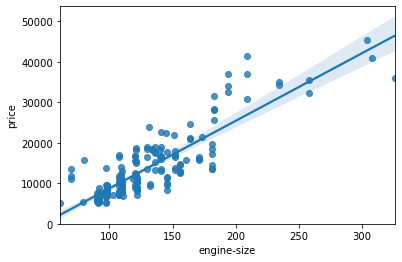

In [8]:
sns.regplot(x = "engine-size", y = "price", data = dataframe)
plt.ylim(0,)

+ As the engine-size goes up, the price goes up
+ this indicates a positive direct correlation between these two variables.
+ Engine size seems like a pretty good predictor of price.

Correlation between engine size and price

In [9]:
dataframe[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


The correlation between 'engine-size' and 'price' is 0.87

Relationship between "highway-mpg" and "price"

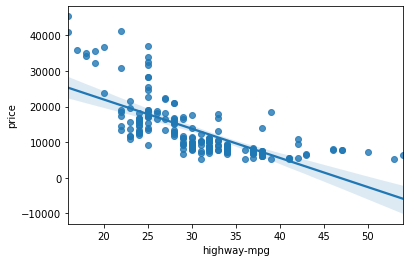

In [10]:
sns.regplot(x = "highway-mpg", y = "price", data = dataframe)

In [11]:
dataframe[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


The correlation between 'highway-mpg' and 'price' is -0.70. And the graph is decreasing.

+ As the highway-mpg goes up, the price goes down
+ this indicates an inverse/negative relationship between these two variables
+ Highway mpg could potentially be a good predictor of price

***Weak Linear Relationship***

Relationship between "peak-rpm" and "price"

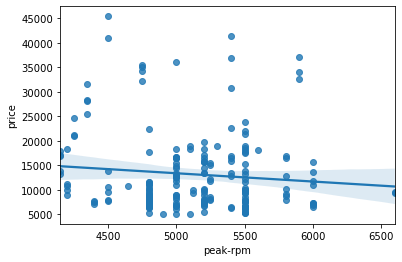

In [12]:
sns.regplot(x = "peak-rpm", y = "price", data = dataframe)

In [13]:
dataframe[["peak-rpm","price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


+ Peak rpm is not a good predictor of price
+ There is no considerable ups and downs for price as peak-rpm increases.
+ And the datapoints are scattered and far from the fitted line.
+ Correlation is approximately -0.1016.

Relationship between "stroke" and "price"

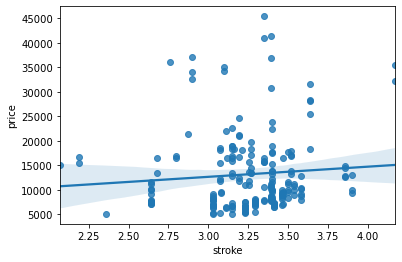

In [14]:
sns.regplot(x = "stroke", y = "price", data = dataframe)

In [15]:
dataframe[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


As in the case of peak-rpm, stroke as well is not a potential predictor of price

#### Categorical Variables

Categorical Variables describes a characteristics of data unit, and are selected from a small group of categories.
+ The categorical variables can have the type "object" or "int64"
+ it is visualized by boxplots

Relationship between "body-style" and "price"

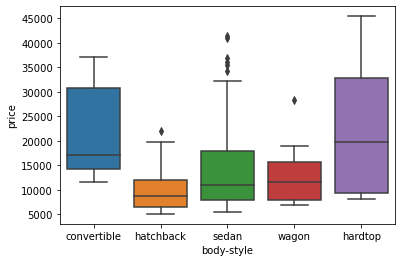

In [16]:
sns.boxplot(x = "body-style", y = "price", data = dataframe)

There is no particular trend in the relationship between body style and price.
+ So it is not a good predictor of price

Relationship between "engine-location" and "price"

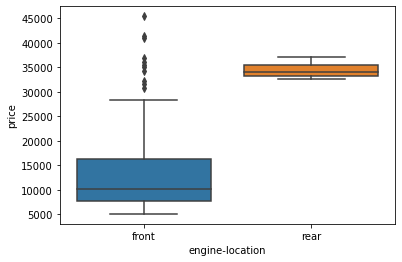

In [17]:
sns.boxplot(x = "engine-location", y = "price", data = dataframe)

+ Clearly, there is big difference for both types of engine location and price of vehicles.

Relationship between "drive-wheels" and "price"

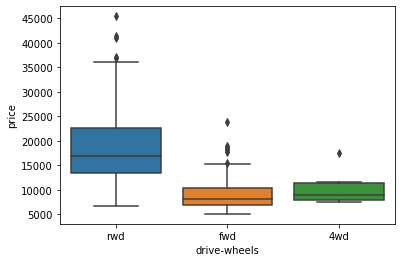

In [18]:
sns.boxplot(x = "drive-wheels", y = "price", data = dataframe)

+ Distribution of price between the different drive-wheels categories differs.

+ drive-wheels could be a predictor of price

Relationship between "num-of-cylinders" and "price"

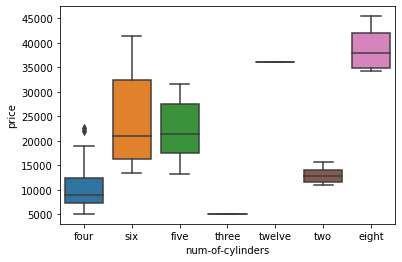

In [19]:
sns.boxplot(x = "num-of-cylinders", y = "price", data = dataframe)

+ num of cylinders is a good predictor of price

Relationship between "engine-type" and "price"

In [24]:
dataframe["engine-type"].value_counts()

ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: engine-type, dtype: int64

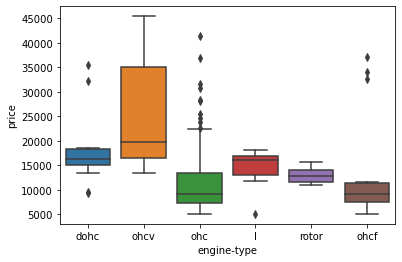

In [25]:
sns.boxplot(x = "engine-type", y = "price", data = dataframe)

+ engine-type is a predictor of price

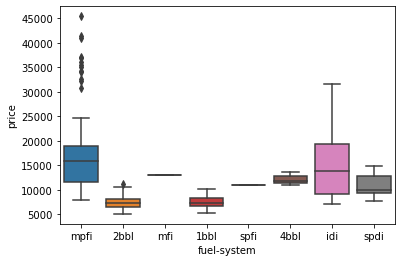

In [26]:
sns.boxplot(x = "fuel-system", y = "price", data = dataframe)

+ fuel-system is not a predictor of price

#### 3.DESCRIPTIVE STATISTICAL ANALYSIS

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics. It will show

+ count of the variable
+ the mean 
+ standard deviation (std)
+ minimum value
+ the IQR (inter quartile range %25,%50 and %75)
+ maximum value

In [27]:
dataframe.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


The default setting of "describe" skips variables of type object. To get object types

In [28]:
dataframe.describe(include = ["object"])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


**ValueCounts**

Value-counts is a good way of understanding how many units of each characteristic/variable we have.

+ the method "value_counts" only works on Pandas series, not Pandas Dataframes

In [29]:
dataframe["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [30]:
## Convert series to a Dataframe ##
dataframe['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [31]:
drive_wheels_counts = dataframe['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [32]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Calculating the engine-location

In [34]:
engine_loc_counts = dataframe["engine-location"].value_counts().to_frame()
engine_loc_counts.rename(columns = {"engine-location":"value_counts"}, inplace = True)
engine_loc_counts.index.name = "engine-location"
engine_loc_counts.head()

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

#### 4. BASICS OF GROUPING

+ The groupby method groups data by different categories.
+ The data is grouped based on one or several variables and analysis is performed on the individual groups.
+ Example, drive-wheels

In [35]:
dataframe["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

find out, on average, which type of drive wheel is most valuable, group "drive-wheels" and then average them 

Select the columns "drive-wheels", "body-style" and "price", and assign it to value df_group1.

In [38]:
df_group1 = dataframe[["drive-wheels","body-style","price"]]
df_group1.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


Calculate the average price for each of the different categories of data.

In [39]:
df_group1 = df_group1.groupby(["drive-wheels"], as_index = False).mean()
df_group1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


+ rear wheel drive is the most expensive on average.
+ and front wheel drive and 4 wheel drive system are almost same.

Group both "drive-wheels" and "body-style" and analze.

In [43]:
df_group2 = dataframe[["drive-wheels","body-style","price"]]
df_group2 = df_group2.groupby(["drive-wheels","body-style"], as_index = False).mean()
df_group2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


+ hardtop rear wheel drive is the most expensive oneon average.
+ hatchback 4 wheel drive is the least expensive.

pivot table of the above diagram

In [44]:
df2_pivot = df_group2.pivot(index = "drive-wheels", columns = "body-style")
df2_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Avoiding missing values

In [46]:
df2_pivot = df2_pivot.fillna(0)
df2_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [47]:
df3_group = dataframe[["body-style","price"]]
df3_group = df3_group.groupby(["body-style"], as_index = False).mean()
df3_group

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [48]:
dataframe["body-style"].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

Plotting

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

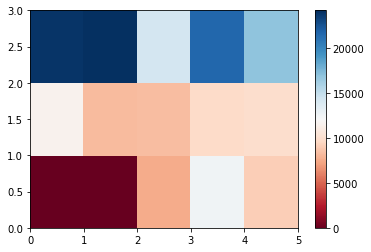

In [50]:
plt.pcolor(df2_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively

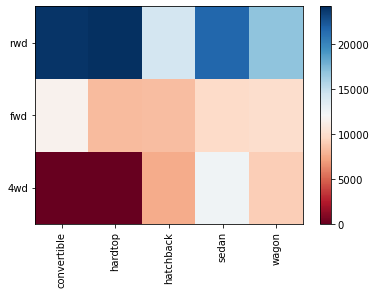

In [51]:
fig, ax = plt.subplots()
im = ax.pcolor(df2_pivot, cmap='RdBu')

## label names ##
row_labels = df2_pivot.columns.levels[1]
col_labels = df2_pivot.index

## move ticks and labels to the center ##
ax.set_xticks(np.arange(df2_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df2_pivot.shape[0]) + 0.5, minor=False)

## insert labels ##
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

## rotate label if too long ##
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Visualization is very important in data science.

#### 5.CORRELATION AND CAUSATION

+ Correlation: a measure of the extent of interdependence between variables.

+ Causation: the relationship between cause and effect between two variables.

+ correlation does not imply causation.

#### Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

+ 1: Total positive linear correlation.
+ 0: No linear correlation, the two variables most likely do not affect each other.
+ -1: Total negative linear correlation.

In [52]:
dataframe.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


#### P-value

The P-value is the probability value that the correlation between these two variables is statistically significant.

when the

+ p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
+ p-value is  <  0.05: there is moderate evidence that the correlation is significant.
+ p-value is  <  0.1: there is weak evidence that the correlation is significant.
+ p-value is  >  0.1: there is no evidence that the correlation is significant.

All these p-value infomrations can be get from scipy library

In [53]:
from scipy import stats

calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [54]:
p_coef,p_value = stats.pearsonr(dataframe["wheel-base"], dataframe["price"])
print("Pearson Coefficient is:", p_coef, "with P value = ", p_value)

Pearson Coefficient is: 0.5846418222655081 with P value =  8.076488270732989e-20


+ p-value is  <  0.001, the correlation between wheel-base and price is statistically significant

+ although the linear relationship is not extremely strong (~0.585)

calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [55]:
p_coef,p_value = stats.pearsonr(dataframe["horsepower"], dataframe["price"])
print("Pearson Coefficient is:", p_coef, "with P value = ", p_value)

Pearson Coefficient is: 0.8096068016571054 with P value =  6.273536270650504e-48


+ p-value is  <  0.001, the correlation between horsepower and price is statistically significant

+  linear relationship is quite strong (~0.809, close to 1)

calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [56]:
p_coef,p_value = stats.pearsonr(dataframe["length"], dataframe["price"])
print("Pearson Coefficient is:", p_coef, "with P value = ", p_value)

Pearson Coefficient is: 0.690628380448364 with P value =  8.016477466158986e-30


+ p-value is  <  0.001, the correlation between length and price is statistically significant

+ linear relationship is moderately strong (~0.691).

calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':

In [57]:
p_coef,p_value = stats.pearsonr(dataframe["width"], dataframe["price"])
print("Pearson Coefficient is:", p_coef, "with P value = ", p_value)

Pearson Coefficient is: 0.7512653440522674 with P value =  9.200335510481516e-38


+ p-value is < 0.001, the correlation between width and price is statistically significant

+ linear relationship is quite strong (~0.751).

calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [58]:
p_coef,p_value = stats.pearsonr(dataframe["curb-weight"], dataframe["price"])
print("Pearson Coefficient is:", p_coef, "with P value = ", p_value)

Pearson Coefficient is: 0.8344145257702846 with P value =  2.1895772388936914e-53


+ p-value is  <  0.001, the correlation between curb-weight and price is statistically significant

+ linear relationship is quite strong (~0.834).

calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price'

In [59]:
p_coef,p_value = stats.pearsonr(dataframe["engine-size"], dataframe["price"])
print("Pearson Coefficient is:", p_coef, "with P value = ", p_value)

Pearson Coefficient is: 0.8723351674455185 with P value =  9.265491622198389e-64


+ p-value is  <  0.001, the correlation between engine-size and price is statistically significant

+ linear relationship is very strong (~0.872).

Calculate the Pearson Correlation Coefficient and P-value of 'bore' and 'price'

In [60]:
p_coef,p_value = stats.pearsonr(dataframe["bore"], dataframe["price"])
print("Pearson Coefficient is:", p_coef, "with P value = ", p_value)

Pearson Coefficient is: 0.5431553832626602 with P value =  8.049189483935489e-17


+ p-value is  <  0.001, the correlation between bore and price is statistically significant

+ linear relationship is only moderate (~0.521).

Calculate the Pearson Correlation Coefficient and P-value of 'city-mpg' and 'price'

In [61]:
p_coef,p_value = stats.pearsonr(dataframe["city-mpg"], dataframe["price"])
print("Pearson Coefficient is:", p_coef, "with P value = ", p_value)

Pearson Coefficient is: -0.6865710067844677 with P value =  2.321132065567674e-29


+ p-value is  <  0.001, the correlation between city-mpg and price is statistically significant

+ coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

Calculate the Pearson Correlation Coefficient and P-value of 'highway-mpg' and 'price'

In [62]:
p_coef,p_value = stats.pearsonr(dataframe["highway-mpg"], dataframe["price"])
print("Pearson Coefficient is:", p_coef, "with P value = ", p_value)

Pearson Coefficient is: -0.7046922650589529 with P value =  1.7495471144477352e-31


+ p-value is < 0.001, the correlation between highway-mpg and price is statistically significant
+ coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

#### 6.ANALYSIS OF VARIANCE (ANOVA)

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

+ F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

+ P-value: P-value tells how statistically significant is our calculated score value.

**Examble: If the price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.**

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy

**Different types 'drive-wheels' impact 'price'**

In [63]:
df_group = dataframe[["drive-wheels","price"]]
df_group = df_group[["drive-wheels","price"]].groupby(["drive-wheels"])
df_group.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


obtain the values of the method group using the method "get_group"

In [64]:
df_group.get_group("4wd")["price"]

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

In [65]:
## ANOVA ##
f_val, p_val = stats.f_oneway(df_group.get_group("4wd")["price"],
                             df_group.get_group("rwd")["price"],
                             df_group.get_group("fwd")["price"])

print("ANOVA Results: F=", f_val, ",P = ", p_val)

ANOVA Results: F= 67.95406500780402 ,P =  3.3945443577150617e-23


Separately for "fwd" and "rwd"

In [66]:
## ANOVA ##
f_val, p_val = stats.f_oneway(df_group.get_group("rwd")["price"],
                             df_group.get_group("fwd")["price"])

print("ANOVA Results: F=", f_val, ",P = ", p_val)

ANOVA Results: F= 130.55331609591104 ,P =  2.235530635567824e-23


Separately for "4wd" and "rwd"

In [67]:
## ANOVA ##
f_val, p_val = stats.f_oneway(df_group.get_group("4wd")["price"],
                             df_group.get_group("rwd")["price"],
                             )

print("ANOVA Results: F=", f_val, ",P = ", p_val)

ANOVA Results: F= 8.580681368924756 ,P =  0.004411492211225333


Separately for "4wd" and "fwd"

In [68]:
## ANOVA ##
f_val, p_val = stats.f_oneway(df_group.get_group("4wd")["price"],
                             df_group.get_group("fwd")["price"])

print("ANOVA Results: F=", f_val, ",P = ", p_val)

ANOVA Results: F= 0.665465750252303 ,P =  0.41620116697845666


#### 7.CONCLUSION

Variables are important to take into account when predicting the car price.
**Continuous Variable**

+ Length
+ Width
+ Curb-Weight
+ Engine-Size
+ Horsepower
+ City-mpg
+ Highway-mpg
+ Wheel-base
+ Bore

**Categorical Variable**

+ Drive-wheels